In [22]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

class Ion:
    def __init__(self,position, charge, mass, v_z):
        self.position = position
        self.charge = charge
        self.m = mass
        self.v_z = v_z
        self.F = np.array([[0],[0],[0]])

class infiniteLengthQuadrupole:
    def __init__(self,R,r_0):
        # rod radius
        self.R = R
        # rod placement radius
        self.r_0 = r_0
        # rod positions
        self.pPole = np.array([[[ (R + r_0)/np.sqrt(2)],
                                [(R + r_0)/np.sqrt(2)],
                                [0]],
                                [[-(R + r_0)/np.sqrt(2)],
                                 [(R + r_0)/np.sqrt(2)],
                                 [0]],
                                [[-(R + r_0)/np.sqrt(2)],
                                 [-(R + r_0)/np.sqrt(2)],
                                 [0]],
                                [[(R + r_0)/np.sqrt(2)],
                                 [-(R + r_0)/np.sqrt(2)],
                                 [0]]])
        # rod pseudo charges
        self.rodsPseudoQ = np.zeros(4)
        # K factor for simplification ofcalculating the equations
        self.K = 1 / (4 * np.pi * sc.epsilon_0)
        
    def check(self):
        print('pole positions')
        print(self.pPole)
        print('pseudo charges')
        print(self.rodsPseudoQ)
        
    def phi_0(self,U, V, f, t):
        return U + V * np.sin(2 * np.pi * f * t)
    
    def coulombForceOnQ1(self,Q1,Q2,r1,r2):
        a = self.K * Q1 * Q2
        r12 = r1 - r2
        mag_r12 = np.linalg.norm(r12)
        # calculate force
        return a * r12 / (mag_r12**3)
        
    
    def calcNewIonPos(self,U,V,f,ion,t_s,t):
        
        # check if ion has left the r_0 boundary
        if np.linalg.norm(ion.position) >= np.linalg.norm(self.r_0):
            return None
        
        signLUT = [1,-1,1,-1]
        index = 0;
        
        # reset force of ion
        ion.F = np.array([[0],[0],[0]])
        
        for Q in self.rodsPseudoQ:

            
            # calculate the pseudo charge points of the quadrupole
            eg = signLUT[index] * self.phi_0(U,V,f,t)/2 * self.K * self.R
            
            # match pseudo charge with ion in z direction
            self.pPole[index][2] = ion.position[2]
        
            # calculate force on ion
            ion.F = ion.F + self.coulombForceOnQ1(ion.charge,
                                                  eg,
                                                 self.pPole[index],
                                                 ion.position)
            
            # update index
            index = index + 1

        newPosition = t_s**2 * 1 / ion.m * ion.F + ion.position
        # velocity component in z
        newPosition[2] =  newPosition[2] + ion.v_z * t_s

        return newPosition
    
t_step = 1e-9
t_sim = 0
N = 100000

# coffein atom 524.50002164 dalton (8.709527e-25 kg)
ion = Ion(np.array([[0],[0],[0]]), 1000 * sc.e, 8.709527e-25,0.01)

# quadrupole
quad = infiniteLengthQuadrupole(5e-3,15e-3)

quad.check()

positions = []

positions.append(ion.position)

for n in range(0,N,1):
    
    newPos = quad.calcNewIonPos(1000,5000,1.1e6,ion,t_step,t_sim)
    
    if(newPos is None):
        print('ion has left the boundary')
        exit
        
    
    ion.position = newPos
    if n % 100 is 0:
        positions.append(newPos)
        
    t_sim += t_step


print('simulation time = ', t_sim)
print(ion.position)

if 0:
    ax = plt.axes(projection='3d')
    #ax.scatter3D(positions[:][0], positions[:][1], positions[:][2], c=positions[:][2], cmap='Greens')
    ax.scatter3D(positions[:][0], positions[:][1], positions[:][2], cmap='Greens')
    plt.show()

print('done!')
# dummy check
if 0:
    ion_1 = Ion(np.array([[0.0000005],[0],[0]]), 1000 * sc.e, 1,0)
    ion_2 = Ion(np.array([[-0.0000005],[0],[0]]), 1000 * sc.e, 1,0)
    print(quad.coulombForceOnQ1(ion_1.charge,ion_2.charge,ion_1.position,ion_2.position))
                 

pole positions
[[[ 0.01414214]
  [ 0.01414214]
  [ 0.        ]]

 [[-0.01414214]
  [ 0.01414214]
  [ 0.        ]]

 [[-0.01414214]
  [-0.01414214]
  [ 0.        ]]

 [[ 0.01414214]
  [-0.01414214]
  [ 0.        ]]]
pseudo charges
[0. 0. 0. 0.]
simulation time =  0.00010000000000013679
[[0.e+00]
 [0.e+00]
 [1.e-06]]
done!


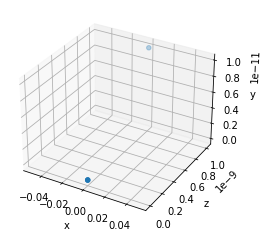

[array([[0],
       [0],
       [0]]), array([[0.e+00],
       [0.e+00],
       [1.e-11]]), array([[0.00e+00],
       [0.00e+00],
       [1.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [2.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [3.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [4.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [5.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [6.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [7.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [8.01e-09]]), array([[0.00e+00],
       [0.00e+00],
       [9.01e-09]]), array([[0.000e+00],
       [0.000e+00],
       [1.001e-08]]), array([[0.000e+00],
       [0.000e+00],
       [1.101e-08]]), array([[0.000e+00],
       [0.000e+00],
       [1.201e-08]]), array([[0.000e+00],
       [0.000e+00],
       [1.301e-08]]), array([[0.000e+00],
       [0.000e+00],
       [1.401e-08]]), array([[0.000e+00],
       [0.000e+00],
       [1.501e-08]]), array

In [25]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
ax = plt.axes(projection='3d')
#ax.scatter3D(positions[:][0], positions[:][1], positions[:][2], c=positions[:][2], cmap='Greens')
ax.scatter3D(positions[:][0], positions[:][2], positions[:][1], cmap='Greens')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
plt.show()


print(positions)